In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy import stats

In [15]:
np.random.seed(121)
N=1000
bananas=pd.DataFrame({
    'length':np.random.normal(8,1,N),
    'width':np.random.normal(4,1,N),
    'class':np.zeros(N,dtype='int')
})
apples=pd.DataFrame({
    'length':np.random.normal(6,1,N),
    'width':np.random.normal(6,1,N),
    'class':np.ones(N,dtype='int')
})

fruits=pd.concat([bananas,apples])
print(fruits)

       length     width  class
0    7.787967  3.593830      0
1    7.715071  3.924653      0
2    7.426102  4.304433      0
3    7.559690  2.682023      0
4    7.669889  4.067065      0
5    9.183695  3.361783      0
6    9.615373  4.212500      0
7    8.367062  3.178908      0
8    7.985881  4.089691      0
9    8.629642  5.147803      0
10   9.709641  4.197118      0
11   6.673013  3.601238      0
12   8.401873  4.316001      0
13   7.808573  3.337991      0
14   9.403826  4.463996      0
15   6.031231  3.861802      0
16   7.209585  2.640405      0
17   7.267278  5.035336      0
18   8.087744  4.415615      0
19   7.499714  3.787622      0
20   8.504114  3.123038      0
21   8.607406  4.507916      0
22   9.166450  4.439579      0
23   8.824424  3.565593      0
24   4.913275  3.683594      0
25   9.164342  2.778893      0
26   9.082652  4.845155      0
27   8.485796  3.679208      0
28   6.765116  4.823372      0
29   6.141118  2.780118      0
..        ...       ...    ...
970  6.0

Text(0, 0.5, 'Width')

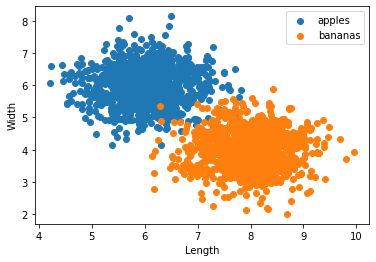

In [4]:
plt.scatter(x=apples['length'],y=apples['width'],label='apples')
plt.scatter(x=bananas['length'],y=bananas['width'],label='bananas')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')

# plt.scatter(x='length',y='width',data=apples,label='apples')
# plt.scatter(x='length',y='width',data=bananas,label='bananas')

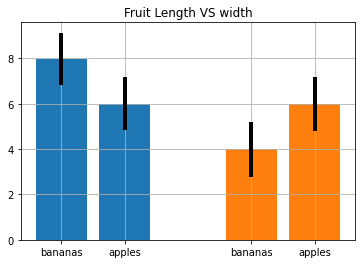

In [5]:
labels=['bananas','apples','bananas','apples']
x=[1,1.5,2.5,3.0]

height=[fruits.loc[fruits['class']==0,'length'].mean(),
        fruits.loc[fruits['class']==1,'length'].mean(),
        fruits.loc[fruits['class']==0,'width'].mean(),
        fruits.loc[fruits['class']==1,'width'].mean()]

yerr=[2*fruits.loc[fruits['class']==0,'length'].std(),
      2*fruits.loc[fruits['class']==1,'length'].std(),
      2*fruits.loc[fruits['class']==0,'width'].std(),
      2*fruits.loc[fruits['class']==1,'width'].std()]

color=['tab:blue','tab:blue','tab:orange','tab:orange']

plt.bar(x=x,
height=height,
color=color,
width=0.4,
error_kw={'lw':4},
yerr=yerr)

plt.xticks(ticks=x,labels=labels)
plt.title('Fruit Length VS width')
plt.grid()

Text(0.5, 1.0, 'Length Distribution ')

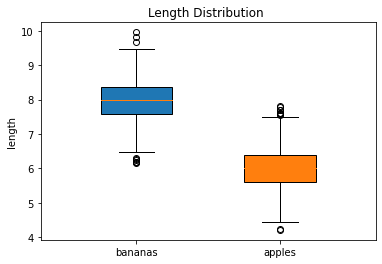

In [6]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

Text(0.5, 1.0, 'Length Distribution ')

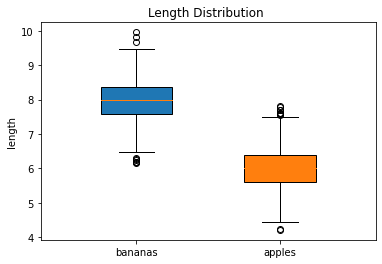

In [7]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

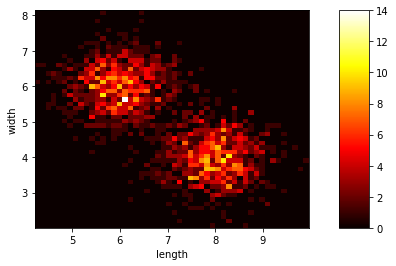

In [8]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'L/W ratio')

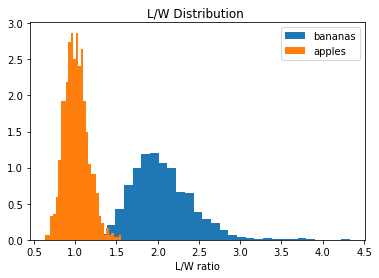

In [9]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

Text(0.5, 0, 'Area')

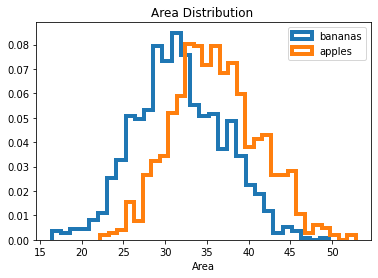

In [10]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

Text(0.5, 0, 'Circumference')

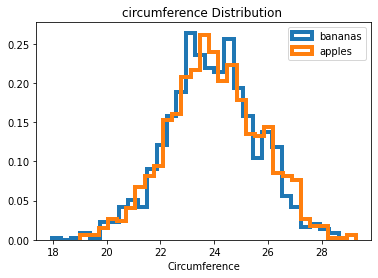

In [11]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')

In [12]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.438425661083, pvalue=0.0)

In [13]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.33979554877528, pvalue=1.4737736564093967e-69)

In [14]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)